<h1> Introduction: Home Credit Default Risk Competition

In this notebook, we will take an initial look at the Home Credit default risk machine learning competition currently hosted on Kaggle. The objective of this competition is to use historical loan application data to predict whether or not an applicant will be able to repay a loan. This is a standard supervised classification task:

Supervised: The labels are included in the training data and the goal is to train a model to learn to predict the labels from the features
Classification: The label is a binary variable, 0 (will repay loan on time), 1 (will have difficulty repaying loan)

<h1> Objective

<b> Predict how capable each applicant is of repaying a loan

<h1> Data

The data is provided by Home Credit, a service dedicated to provided lines of credit (loans) to the unbanked population. Predicting whether or not a client will repay a loan or have difficulty is a critical business need, and Home Credit is hosting this competition on Kaggle to see what sort of models the machine learning community can develop to help them in this task.


application_train/application_test: the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid.

<h1> Data Wrangling

In [1]:

#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()

In [2]:
#Importing the dataset
df_train = pd.read_csv('application_train.csv')
df_test=pd.read_csv('application_test.csv')

In [3]:
#Shape of dataset
df_train.shape

(307511, 122)

In [4]:
df_train.head(8)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100002         Cash loans           M            N               Y   
1      100003         Cash loans           F            N               N   
2      100004    Revolving loans           M            Y               Y   
3      100006         Cash loans           F            N               Y   
4      100007         Cash loans           M            N               Y   
5      100008         Cash loans           M            N               Y   
6      100009         Cash loans           F            Y               Y   
7      100010         Cash loans           M            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   
5             0           99000.0    490495.5      27517.5         454500.0   
6             1          171000.0   1560726.0      41301.0        1395000.0   
7             0          360000.0   1530000.0      42075.0        1530000.0   

    ...   FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0   ...                  0                0                0   
1   ...                  0                0                0   
2   ...                  0                0                0   
3   ...                  0                0                0   
4   ...                  0                0                0   
5   ...                  0                0                0   
6   ...                  0                0                0   
7   ...                  0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   
5                        0.0                       0.0   
6                        0.0                       0.0   
7                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   
5                         0.0                        0.0   
6                         0.0                        1.0   
7                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  TARGET  
0                        0.0                         1.0       1  
1                        0.0                         0.0       0  
2                        0.0                         0.0       0  
3                        NaN                         NaN       0  
4                        0.0                         0.0       0  
5                        1.0                         1.0       0  
6                        1.0                         2.0       0  
7                        0.0                         0.0       0  

[8 rows x 122 columns]

In [5]:
df_train.describe()

SK_ID_CURR   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  307511.000000  307511.000000      3.075110e+05  3.075110e+05   
mean   278180.518577       0.417052      1.687979e+05  5.990260e+05   
std    102790.175348       0.722121      2.371231e+05  4.024908e+05   
min    100002.000000       0.000000      2.565000e+04  4.500000e+04   
25%    189145.500000       0.000000      1.125000e+05  2.700000e+05   
50%    278202.000000       0.000000      1.471500e+05  5.135310e+05   
75%    367142.500000       1.000000      2.025000e+05  8.086500e+05   
max    456255.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  307499.000000     3.072330e+05               307511.000000   
mean    27108.573909     5.383962e+05                    0.020868   
std     14493.737315     3.694465e+05                    0.013831   
min      1615.500000     4.050000e+04                    0.000290   
25%     16524.000000     2.385000e+05                    0.010006   
50%     24903.000000     4.500000e+05                    0.018850   
75%     34596.000000     6.795000e+05                    0.028663   
max    258025.500000     4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION      ...        \
count  307511.000000  307511.000000      307511.000000      ...         
mean   -16036.995067   63815.045904       -4986.120328      ...         
std      4363.988632  141275.766519        3522.886321      ...         
min    -25229.000000  -17912.000000      -24672.000000      ...         
25%    -19682.000000   -2760.000000       -7479.500000      ...         
50%    -15750.000000   -1213.000000       -4504.000000      ...         
75%    -12413.000000    -289.000000       -2010.000000      ...         
max     -7489.000000  365243.000000           0.000000      ...         

       FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000   
mean           0.000595          0.000507          0.000335   
std            0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR         TARGET  
count              265992.000000               265992.000000  307511.000000  
mean                    0.265474                    1.899974       0.080729  
std                     0.794056                    1.869295       0.272419  
min                     0.000000                    0.00

In [6]:
df_train['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [7]:
df_test.head(5)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

              ...             FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                            0                0   
1             ...                            0                0   
2             ...                            0                0   
3             ...                            0                0   
4             ...                            0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        0.0   
4                0                0                        NaN   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        NaN                         NaN   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        1.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         0.0  
1                         3.0  
2                         4.0  
3                         3.0  
4                         NaN  

[5 rows x 121 columns]

In [8]:
df_test.describe()

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count   48744.000000  48744.000000      4.874400e+04  4.874400e+04   
mean   277796.676350      0.397054      1.784318e+05  5.167404e+05   
std    103169.547296      0.709047      1.015226e+05  3.653970e+05   
min    100001.000000      0.000000      2.694150e+04  4.500000e+04   
25%    188557.750000      0.000000      1.125000e+05  2.606400e+05   
50%    277549.000000      0.000000      1.575000e+05  4.500000e+05   
75%    367555.500000      1.000000      2.250000e+05  6.750000e+05   
max    456250.000000     20.000000      4.410000e+06  2.245500e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count   48720.000000     4.874400e+04                48744.000000   
mean    29426.240209     4.626188e+05                    0.021226   
std     16016.368315     3.367102e+05                    0.014428   
min      2295.000000     4.500000e+04                    0.000253   
25%     17973.000000     2.250000e+05                    0.010006   
50%     26199.000000     3.960000e+05                    0.018850   
75%     37390.500000     6.300000e+05                    0.028663   
max    180576.000000     2.245500e+06                    0.072508   

         DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
count  48744.000000   48744.000000       48744.000000   
mean  -16068.084605   67485.366322       -4967.652716   
std     4325.900393  144348.507136        3552.612035   
min   -25195.000000  -17463.000000      -23722.000000   
25%   -19637.000000   -2910.000000       -7459.250000   
50%   -15785.000000   -1293.000000       -4490.000000   
75%   -12496.000000    -296.000000       -1901.000000   
max    -7338.000000  365243.000000           0.000000   

                  ...              FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
count             ...                  48744.000000           48744.0   
mean              ...                      0.001559               0.0   
std               ...                      0.039456               0.0   
min               ...                      0.000000               0.0   
25%               ...                      0.000000               0.0   
50%               ...                      0.000000               0.0   
75%               ...                      0.000000               0.0   
max               ...                      1.000000               0.0   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
count           48744.0           48744.0                42695.000000   
mean                0.0               0.0                    0.002108   
std                 0.0               0.0                    0.046373   
min                 0.0               0.0                    0.000000   
25%                 0.0               0.0                    0.000000   
50%                 0.0               0.0                    0.000000   
75%                 0.0               0.0                    0.000000   
max                 0.0               0.0                    2.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count               42695.000000                42695.000000   
mean                    0.001803                    0.002787   
std                     0.046132                    0.054037   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     2.000000                    2.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count               42695.000000               42695.000000   
mean                    0.009299                   0.546902   
std                     0.110924                   0.693305   
min                     0.000000                   0.000000   
25%                     0.000000   

In [9]:
df_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

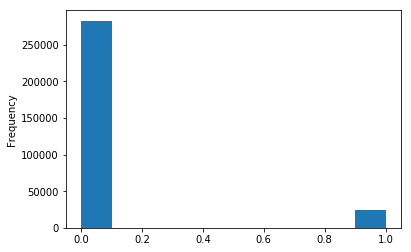

In [10]:
df_train['TARGET'].astype(int).plot.hist();

From this information, we see this is an imbalanced class problem(http://www.chioka.in/class-imbalance-problem/). There are far more loans that were repaid on time than loans that were not repaid. Once we get into more sophisticated machine learning models, we can weight the classes by their representation in the data to reflect this imbalance.

<h1> Examine Missing Values

In [11]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [12]:
# Missing values statistics
missing_values = missing_values_table(df_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
NONLIVINGAPARTMENTS_AVG           213514               69.4
FONDKAPREMONT_MODE                210295               68.4
LIVINGAPARTMENTS_MODE             210199               68.4
LIVINGAPARTMENTS_MEDI             210199               68.4
LIVINGAPARTMENTS_AVG              210199               68.4
FLOORSMIN_MODE                    208642               67.8
FLOORSMIN_MEDI                    208642               67.8
FLOORSMIN_AVG                     208642               67.8
YEARS_BUILD_MODE                  204488               66.5
YEARS_BUILD_MEDI                  204488               66.5
YEARS_BUILD_AVG                   204488               66.5
OWN_CAR_AGE                       202929               66.0
LANDAREA_AVG                      182590               59.4
LANDAREA_MEDI                     182590               59.4
LANDAREA_MODE                     182590               59.4

When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation). In later work, we will use models such as XGBoost that can handle missing values with no need for imputation. Another option would be to drop columns with a high percentage of missing values, although it is impossible to know ahead of time if these columns will be helpful to our model. Therefore, we will keep all of the columns for now.

<h1> Column Types

Let's look at the number of columns of each data type. `int64` and `float64` are numeric variables ([which can be either discrete or continuous](https://stats.stackexchange.com/questions/206/what-is-the-difference-between-discrete-data-and-continuous-data)). `object` columns contain strings and are  [categorical features.](http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/what-are-categorical-discrete-and-continuous-variables/) . 

In [13]:
# Number of each type of column
df_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

Let's now look at the number of unique entries in each of the object (categorical) columns.

In [14]:
# Number of unique classes in each object column
df_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Most of the categorical variables have a relatively small number of unique entries. We will need to find a way to deal with these categorical variables!

<h1> Encoding Categorical Variables

Before we go any further, we need to deal with pesky categorical variables. A machine learning model unfortunately cannot deal with categorical variables (except for some models such as LightGBM). Therefore, we have to find a way to encode (represent) these variables as numbers before handing them off to the model. There are two main ways to carry out this process:

Label encoding: assign each unique category in a categorical variable with an integer. No new columns are created. An example is shown below
image
![image](https://raw.githubusercontent.com/WillKoehrsen/Machine-Learning-Projects/master/label_encoding.png)

One-hot encoding: create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.
image
![image](https://raw.githubusercontent.com/WillKoehrsen/Machine-Learning-Projects/master/one_hot_encoding.png)

The problem with label encoding is that it gives the categories an arbitrary ordering. The value assigned to each of the categories is random and does not reflect any inherent aspect of the category. In the example above, programmer recieves a 4 and data scientist a 1, but if we did the same process again, the labels could be reversed or completely different. The actual assignment of the integers is arbitrary. Therefore, when we perform label encoding, the model might use the relative value of the feature (for example programmer = 4 and data scientist = 1) to assign weights which is not what we want. If we only have two unique values for a categorical variable (such as Male/Female), then label encoding is fine, but for more than 2 unique categories, one-hot encoding is the safe option.

There is some debate about the relative merits of these approaches, and some models can deal with label encoded categorical variables with no issues. Here is a good Stack Overflow discussion. I think (and this is just a personal opinion) for categorical variables with many classes, one-hot encoding is the safest approach because it does not impose arbitrary values to categories. The only downside to one-hot encoding is that the number of features (dimensions of the data) can explode with categorical variables with many categories. To deal with this, we can perform one-hot encoding followed by PCA or other dimensionality reduction methods to reduce the number of dimensions (while still trying to preserve information).

In this notebook, we will use Label Encoding for any categorical variables with only 2 categories and One-Hot Encoding for any categorical variables with more than 2 categories. This process may need to change as we get further into the project, but for now, we will see where this gets us. (We will also not use any dimensionality reduction in this notebook but will explore in future iter

<h1> Label Encoding and One-Hot Encoding

Let's implement the policy described above: for any categorical variable (`dtype == object`) with 2 unique categories, we will use label encoding, and for any categorical variable with more than 2 unique categories, we will use one-hot encoding. 

For label encoding, we use the Scikit-Learn `LabelEncoder` and for one-hot encoding, the pandas `get_dummies(df)` function.

In [15]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df_train:
    if df_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(df_train[col])
            # Transform both training and testing data
            df_train[col] = le.transform(df_train[col])
            df_test[col] = le.transform(df_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [16]:
# one-hot encoding of categorical variables
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

print('Training Features shape: ', df_train.shape)
print('Testing Features shape: ', df_test.shape)

('Training Features shape: ', (307511, 243))
('Testing Features shape: ', (48744, 239))


<h1> Aligning Training and Testing Data

Aligning Training and Testing Data
There need to be the same features (columns) in both the training and testing data. One-hot encoding has created more columns in the training data because there were some categorical variables with categories not represented in the testing data. To remove the columns in the training data that are not in the testing data, we need to align the dataframes. First we extract the target column from the training data (because this is not in the testing data but we need to keep this information). When we do the align, we must make sure to set axis = 1 to align the dataframes based on the columns and not on the rows!

In [17]:
train_labels = df_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
df_train, df_test = df_train.align(df_test, join = 'inner', axis = 1)

# Add the target back in
df_train['TARGET'] = train_labels

print('Training Features shape: ', df_train.shape)
print('Testing Features shape: ', df_test.shape)

('Training Features shape: ', (307511, 240))
('Testing Features shape: ', (48744, 239))


The training and testing datasets now have the same features which is required for machine learning. The number of features has grown significantly due to one-hot encoding. At some point we probably will want to try dimensionality reduction (removing features that are not relevant) to reduce the size of the datasets.

In [18]:
# # Missing Value Strategy
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import Imputer
# from sklearn.model_selection import cross_val_score

# rng = np.random.RandomState(0)

# # X_full, y_full = df_train.iloc[:, :-1], df_train.iloc[:, -1]
# n_samples = X_full.shape[0]
# n_features = X_full.shape[1]

In [19]:

# # Estimate the score on the entire dataset, with no missing values
# estimator = RandomForestRegressor(random_state=0, n_estimators=100)
# score = cross_val_score(estimator, X_full, y_full).mean()
# print("Score with the entire dataset = %.2f" % score)

In [20]:

# # Add missing values in 75% of the lines
# missing_rate = 0.75
# n_missing_samples = np.floor(n_samples * missing_rate)
# missing_samples = np.hstack((np.zeros(n_samples - n_missing_samples,
#                                       dtype=np.bool),
#                              np.ones(n_missing_samples,
#                                      dtype=np.bool)))
# rng.shuffle(missing_samples)
# missing_features = rng.randint(0, n_features, n_missing_samples)

# # Estimate the score without the lines containing missing values
# X_filtered = X_full[~missing_samples, :]
# y_filtered = y_full[~missing_samples]
# estimator = RandomForestRegressor(random_state=0, n_estimators=100)
# score = cross_val_score(estimator, X_filtered, y_filtered).mean()
# print("Score without the samples containing missing values = %.2f" % score)


# # Estimate the score after imputation of the missing values
# X_missing = X_full.copy()
# X_missing[np.where(missing_samples)[0], missing_features] = 0
# y_missing = y_full.copy()
# estimator = Pipeline([("imputer", Imputer(missing_values=0,
#                                           strategy="mean",
#                                           axis=0)),
#                       ("forest", RandomForestRegressor(random_state=0,
#                                                        n_estimators=100))])
# score = cross_val_score(estimator, X_missing, y_missing).mean()
# print("Score after imputation of the missing values = %.2f" % score)

<h1> Resuming Exploratory Data Analysis

Anomalies

One problem we always want to be on the lookout for when doing EDA is anomalies within the data. These may be due to mis-typed numbers, errors in measuring equipment, or they could be valid but extreme measurements. One way to support anomalies quantitatively is by looking at the statistics of a column using the `describe` method. The numbers in the `DAYS_BIRTH` column are negative because they are recorded relative to the current loan application. To see these stats in years, we can mutliple by -1 and divide by the number of days in a year:



In [21]:
# # Missing values statistics
# missing_values = missing_values_table(df_train)
# missing_values.head(20)

In [22]:
(df_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Those ages look reasonable. There are no outliers for the age on either the high or low end. How about the days of employment?

In [23]:
df_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

That doesn't look right! The maximum value (besides being positive) is about 1000 years!

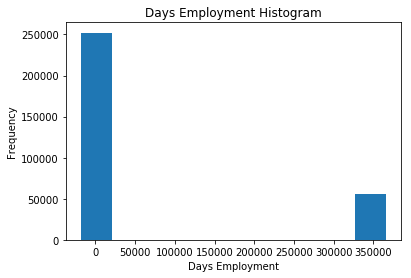

In [24]:
df_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

Just out of curiousity, let's subset the anomalous clients and see if they tend to have higher or low rates of default than the rest of the clients.

<h1> Missing Values Strategy # 1 - Identify Features with Missing Values -> Replace with NaN -> Remove all Features with Missing Value -> Assess Model using Logistic Regression

In [25]:
# Missing values statistics
missing_values = missing_values_table(df_train)
missing_values.head(20)

Your selected dataframe has 240 columns.
There are 61 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MODE                   214865               69.9
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
NONLIVINGAPARTMENTS_MODE          213514               69.4
NONLIVINGAPARTMENTS_AVG           213514               69.4
NONLIVINGAPARTMENTS_MEDI          213514               69.4
LIVINGAPARTMENTS_MEDI             210199               68.4
LIVINGAPARTMENTS_AVG              210199               68.4
LIVINGAPARTMENTS_MODE             210199               68.4
FLOORSMIN_MEDI                    208642               67.8
FLOORSMIN_MODE                    208642               67.8
FLOORSMIN_AVG                     208642               67.8
YEARS_BUILD_AVG                   204488               66.5
YEARS_BUILD_MODE                  204488               66.5
YEARS_BUILD_MEDI                  204488               66.5
OWN_CAR_AGE                       202929               66.0
LANDAREA_MEDI                     182590               59.4
LANDAREA_MODE                     182590               59.4
LANDAREA_AVG                      182590               59.4
BASEMENTAREA_MODE                 179943               58.5

In [26]:
#Omitting TARGET from Column list
train= df_train.drop(columns = ['TARGET'])
# Replace Nulls with NaN
# mark zero values as missing or NaN
train.iloc[:, :] = train.iloc[:, :].replace('' , np.NaN)
# count the number of NaN values in each column
print(train.isnull().sum())

SK_ID_CURR                                       0
NAME_CONTRACT_TYPE                               0
FLAG_OWN_CAR                                     0
FLAG_OWN_REALTY                                  0
CNT_CHILDREN                                     0
AMT_INCOME_TOTAL                                 0
AMT_CREDIT                                       0
AMT_ANNUITY                                     12
AMT_GOODS_PRICE                                278
REGION_POPULATION_RELATIVE                       0
DAYS_BIRTH                                       0
DAYS_EMPLOYED                                    0
DAYS_REGISTRATION                                0
DAYS_ID_PUBLISH                                  0
OWN_CAR_AGE                                 202929
FLAG_MOBIL                                       0
FLAG_EMP_PHONE                                   0
FLAG_WORK_PHONE                                  0
FLAG_CONT_MOBILE                                 0
FLAG_PHONE                     

In [27]:
# print the first 20 rows of data
print(df_train.head(20))

    SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       100002                   0             0                1   
1       100003                   0             0                0   
2       100004                   1             1                1   
3       100006                   0             0                1   
4       100007                   0             0                1   
5       100008                   0             0                1   
6       100009                   0             1                1   
7       100010                   0             1                1   
8       100011                   0             0                1   
9       100012                   1             0                1   
10      100014                   0             0                1   
11      100015                   0             0                1   
12      100016                   0             0                1   
13      100017                   0

In [28]:
print (train.head(10))

   SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002                   0             0                1   
1      100003                   0             0                0   
2      100004                   1             1                1   
3      100006                   0             0                1   
4      100007                   0             0                1   
5      100008                   0             0                1   
6      100009                   0             1                1   
7      100010                   0             1                1   
8      100011                   0             0                1   
9      100012                   1             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             

<h1> Baseline Model

<h1> Dropping Rows with Missing Values ->Baselining model with Logistic Regression

In [29]:
# drop rows with missing values
train.dropna(inplace=True)
# summarize the number of rows and columns in the dataset
#Add in the TARGET
train['TARGET']=df_train['TARGET']
print(train.shape)

(11351, 240)


In [30]:
train.head(10)

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
71       100083                   0             1                1   
124      100145                   0             1                1   
143      100165                   0             1                1   
152      100179                   0             1                0   
161      100190                   0             1                0   
164      100193                   0             1                0   
249      100289                   0             1                0   
255      100295                   0             1                0   
296      100341                   0             1                1   
298      100343                   0             1                1   

     CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
71              0          103500.0    573628.5      24435.0         463500.0   
124             1          202500.0    260725.5      16789.5         198000.0   
143             0          175500.0   1293502.5      35568.0        1129500.0   
152             0          202500.0    675000.0      53329.5         675000.0   
161             0          162000.0    263686.5      24781.5         238500.0   
164             0          225000.0    296280.0      15124.5         225000.0   
249             0          202500.0    526491.0      26878.5         454500.0   
255             1          225000.0   1019205.0      31032.0         774000.0   
296             0           76500.0    545040.0      20677.5         450000.0   
298             0          315000.0     90000.0       4504.5          90000.0   

     REGION_POPULATION_RELATIVE   ...    WALLSMATERIAL_MODE_Block  \
71                     0.009657   ...                           0   
124                    0.018850   ...                           0   
143                    0.018850   ...                           0   
152                    0.031329   ...                           0   
161                    0.022625   ...                           0   
164                    0.020246   ...                           0   
249                    0.022625   ...                           0   
255                    0.072508   ...                           0   
296                    0.031329   ...                           0   
298                    0.022800   ...                           0   

     WALLSMATERIAL_MODE_Mixed  WALLSMATERIAL_MODE_Monolithic  \
71                          0                              0   
124                         0                              0   
143                         0                              0   
152                         0                              1   
161                         0                              0   
164                         0                              0   
249                         0                              0   
255                         0                              0   
296                         0                              0   
298                         0                              0   

     WALLSMATERIAL_MODE_Others  WALLSMATERIAL_MODE_Panel  \
71                           0                         0   
124                          0                         1   
143                          0                         1   
152                          0                         0   
161                          0                         1   
164                          0                         0   
249                          0                         1   
255                          0                         1   
296                          0                         0   
298                          0                         1   

     WALLSMATERIAL_MODE_Stone, brick  WALLSMATERIAL_MODE_Wooden  \
71                                 1                          0   
124                                0                          0   
143            

In [31]:
#Deploying Logistic Regression
#Splitting the dataset

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

X = train.iloc[:, :-1]
y = train.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [33]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.93      1.00      0.97      2122
          1       0.00      0.00      0.00       149

avg / total       0.87      0.93      0.90      2271

0.9343901365037428


<b>The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples. The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0. The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important. The support is the number of occurrences of each class in y_true.

<h1> Another Approach: Identify Features with Missing Values -> Replace with NaN -> Impute all Features with Missing Value -> Assess Model using Logistic Regression

In [34]:
df_train = pd.read_csv('application_train.csv')

In [35]:
missing_values = missing_values_table(df_train)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


In [36]:
print (df_test.shape)

(48744, 239)


In [37]:
# Number of unique classes in each object column
df_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [38]:
print (list(df_train[col].unique()))

[1, 0]


In [39]:
# from sklearn.preprocessing import LabelEncoder
# # Create a label encoder object
# le = LabelEncoder()
# le_count = 0

# # Iterate through the columns
# for col in df_train:
#     if df_train[col].dtype == 'object':
#         # If 2 or fewer unique categories
#         if len(list(df_train[col].unique())) <= 2:
#             # Train on the training data
#             le.fit(df_train[col])
#             # Transform both training and testing data
#             df_train[col] = le.transform(df_train[col])
#             df_test[col] = le.transform(df_test[col])
            
#             # Keep track of how many columns were label encoded
#             le_count += 1
            
# print('%d columns were label encoded.' % le_count)

In [40]:
df_train = pd.get_dummies(df_train)
print('Training Features shape: ', df_train.shape)

('Training Features shape: ', (307511, 246))


In [41]:
train_labels = df_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
df_train, df_test = df_train.align(df_test, join = 'inner', axis = 1)

# Add the target back in
df_train['TARGET'] = train_labels

print('Training Features shape: ', df_train.shape)
print('Testing Features shape: ', df_test.shape)

('Training Features shape: ', (307511, 237))
('Testing Features shape: ', (48744, 236))


<h1> Missing Values Strategy # 2 - Identify Features with Missing Values -> Replace with NaN -> Impute all Features with Missing Value -> Assess Model using Logistic Regression

In [42]:
# Missing values statistics
missing_values = missing_values_table(df_train)
missing_values.head(20)

Your selected dataframe has 237 columns.
There are 61 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MODE                   214865               69.9
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
NONLIVINGAPARTMENTS_MODE          213514               69.4
NONLIVINGAPARTMENTS_AVG           213514               69.4
NONLIVINGAPARTMENTS_MEDI          213514               69.4
LIVINGAPARTMENTS_MEDI             210199               68.4
LIVINGAPARTMENTS_AVG              210199               68.4
LIVINGAPARTMENTS_MODE             210199               68.4
FLOORSMIN_MEDI                    208642               67.8
FLOORSMIN_MODE                    208642               67.8
FLOORSMIN_AVG                     208642               67.8
YEARS_BUILD_AVG                   204488               66.5
YEARS_BUILD_MODE                  204488               66.5
YEARS_BUILD_MEDI                  204488               66.5
OWN_CAR_AGE                       202929               66.0
LANDAREA_MEDI                     182590               59.4
LANDAREA_MODE                     182590               59.4
LANDAREA_AVG                      182590               59.4
BASEMENTAREA_MODE                 179943               58.5

In [43]:
df_train.head(10)

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0      100002             0          202500.0    406597.5      24700.5   
1      100003             0          270000.0   1293502.5      35698.5   
2      100004             0           67500.0    135000.0       6750.0   
3      100006             0          135000.0    312682.5      29686.5   
4      100007             0          121500.0    513000.0      21865.5   
5      100008             0           99000.0    490495.5      27517.5   
6      100009             1          171000.0   1560726.0      41301.0   
7      100010             0          360000.0   1530000.0      42075.0   
8      100011             0          112500.0   1019610.0      33826.5   
9      100012             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801       -9461           -637   
1        1129500.0                    0.003541      -16765          -1188   
2         135000.0                    0.010032      -19046           -225   
3         297000.0                    0.008019      -19005          -3039   
4         513000.0                    0.028663      -19932          -3038   
5         454500.0                    0.035792      -16941          -1588   
6        1395000.0                    0.035792      -13778          -3130   
7        1530000.0                    0.003122      -18850           -449   
8         913500.0                    0.018634      -20099         365243   
9         405000.0                    0.019689      -14469          -2019   

   DAYS_REGISTRATION   ...    WALLSMATERIAL_MODE_Block  \
0            -3648.0   ...                           0   
1            -1186.0   ...                           1   
2            -4260.0   ...                           0   
3            -9833.0   ...                           0   
4            -4311.0   ...                           0   
5            -4970.0   ...                           0   
6            -1213.0   ...                           0   
7            -4597.0   ...                           0   
8            -7427.0   ...                           0   
9           -14437.0   ...                           0   

   WALLSMATERIAL_MODE_Mixed  WALLSMATERIAL_MODE_Monolithic  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   
5                         0                              0   
6                         0                              0   
7                         0                              0   
8                         0                              0   
9                         0                              0   

   WALLSMATERIAL_MODE_Others  WALLSMATERIAL_MODE_Panel  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   
5                          0                         0   
6                          0                         0   
7                          0                         0   
8                          0                         0   
9                          0                         0   

   WALLSMATERIAL_MODE_Stone, brick  WALLSMATERIAL_MODE_Wooden  \
0                                1                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                    

In [44]:
# Replace Nulls with NaN
# mark zero values as missing or NaN

df_train.iloc[:, :-1] = df_train.iloc[:, :-1].replace('', np.NaN)
# count the number of NaN values in each column
print(df_train.isnull().sum())

# fill missing values with mean column values
df_train.fillna(df_train.mean(), inplace=True)
# count the number of NaN values in each column
print(df_train.isnull().sum())

SK_ID_CURR                                       0
CNT_CHILDREN                                     0
AMT_INCOME_TOTAL                                 0
AMT_CREDIT                                       0
AMT_ANNUITY                                     12
AMT_GOODS_PRICE                                278
REGION_POPULATION_RELATIVE                       0
DAYS_BIRTH                                       0
DAYS_EMPLOYED                                    0
DAYS_REGISTRATION                                0
DAYS_ID_PUBLISH                                  0
OWN_CAR_AGE                                 202929
FLAG_MOBIL                                       0
FLAG_EMP_PHONE                                   0
FLAG_WORK_PHONE                                  0
FLAG_CONT_MOBILE                                 0
FLAG_PHONE                                       0
FLAG_EMAIL                                       0
CNT_FAM_MEMBERS                                  2
REGION_RATING_CLIENT           

In [45]:
df_train.head(10)

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0      100002             0          202500.0    406597.5      24700.5   
1      100003             0          270000.0   1293502.5      35698.5   
2      100004             0           67500.0    135000.0       6750.0   
3      100006             0          135000.0    312682.5      29686.5   
4      100007             0          121500.0    513000.0      21865.5   
5      100008             0           99000.0    490495.5      27517.5   
6      100009             1          171000.0   1560726.0      41301.0   
7      100010             0          360000.0   1530000.0      42075.0   
8      100011             0          112500.0   1019610.0      33826.5   
9      100012             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0         351000.0                    0.018801       -9461           -637   
1        1129500.0                    0.003541      -16765          -1188   
2         135000.0                    0.010032      -19046           -225   
3         297000.0                    0.008019      -19005          -3039   
4         513000.0                    0.028663      -19932          -3038   
5         454500.0                    0.035792      -16941          -1588   
6        1395000.0                    0.035792      -13778          -3130   
7        1530000.0                    0.003122      -18850           -449   
8         913500.0                    0.018634      -20099         365243   
9         405000.0                    0.019689      -14469          -2019   

   DAYS_REGISTRATION   ...    WALLSMATERIAL_MODE_Block  \
0            -3648.0   ...                           0   
1            -1186.0   ...                           1   
2            -4260.0   ...                           0   
3            -9833.0   ...                           0   
4            -4311.0   ...                           0   
5            -4970.0   ...                           0   
6            -1213.0   ...                           0   
7            -4597.0   ...                           0   
8            -7427.0   ...                           0   
9           -14437.0   ...                           0   

   WALLSMATERIAL_MODE_Mixed  WALLSMATERIAL_MODE_Monolithic  \
0                         0                              0   
1                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   
5                         0                              0   
6                         0                              0   
7                         0                              0   
8                         0                              0   
9                         0                              0   

   WALLSMATERIAL_MODE_Others  WALLSMATERIAL_MODE_Panel  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   
5                          0                         0   
6                          0                         0   
7                          0                         0   
8                          0                         0   
9                          0                         0   

   WALLSMATERIAL_MODE_Stone, brick  WALLSMATERIAL_MODE_Wooden  \
0                                1                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                    

In [46]:
# #Impute all features with Missing values

# from sklearn.preprocessing import Imputer
# # fill missing values with mean column values
# values = df_train.values
# imputer = Imputer()
# transformed_values = imputer.fit_transform(values)
# # count the number of NaN values in each column
# print(np.isnan(transformed_values).sum())

In [47]:
#df_train.head(df_train.iloc[:,-1]==0)

In [48]:
#LDA

from sklearn.preprocessing import Imputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# split dataset into inputs and outputs
#values = dataset.values
X = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1]
# fill missing values with mean column values
imputer = Imputer()
transformed_X = imputer.fit_transform(X)
# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=3, random_state=7)
result = cross_val_score(model, transformed_X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.9189199767969486


In [49]:
# Deploying Logistic Regression
#Splitting the dataset
#Keep the following 6 features (variables) which are important
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

X = df_train.iloc[:, :-1]
y = df_train.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


In [51]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96     56648
          1       0.00      0.00      0.00      4855

avg / total       0.85      0.92      0.88     61503

0.9210607612636782


<b>The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples. The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0. The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important. The support is the number of occurrences of each class in y_true.

<h1> Baseline with Feature Scaling

<b> To get a baseline, we will use all of the features after encoding the categorical variables. We will preprocess the data by filling in the missing values (imputation) and normalizing the range of the features (feature scaling). The following code performs both of these preprocessing steps.

To get a baseline, we will use all of the features after encoding the categorical variables. We will preprocess the data by filling in the missing values (imputation) and normalizing the range of the features (feature scaling). The following code performs both of these preprocessing steps.

In [52]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
if 'TARGET' in df_train:
    train = df_train.drop(columns = ['TARGET'])
else:
    train = df_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = df_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(df_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

('Training data shape: ', (307511, 236))
('Testing data shape: ', (48744, 236))


We will use LogisticRegressionfrom Scikit-Learn for our first model. The only change we will make from the default model settings is to lower the regularization parameter, C, which controls the amount of overfitting (a lower value should decrease overfitting). This will get us slightly better results than the default LogisticRegression, but it still will set a low bar for any future models.

Here we use the familiar Scikit-Learn modeling syntax: we first create the model, then we train the model using .fit and then we make predictions on the testing data using .predict_proba (remember that we want probabilities and not a 0 or 1).

In [53]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Now that the model has been trained, we can use it to make predictions. We want to predict the probabilities of not paying a loan, so we use the model predict.proba method. This returns an m x 2 array where m is the number of observations. The first column is the probability of the target being 0 and the second column is the probability of the target being 1 (so for a single row, the two columns must sum to 1). We want the probability the loan is not repaid, so we will select the second column.

The following code makes the predictions and selects the correct column.

In [54]:
# Make predictions
# Make sure to select the last column only
log_reg_pred = log_reg.predict_proba(test)[:, -1]

The predictions must be in the format shown in the sample_submission.csv file, where there are only two columns: SK_ID_CURR and TARGET. We will create a dataframe in this format from the test set and the predictions called submit.

In [55]:
# Submission dataframe
submit = df_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

SK_ID_CURR    TARGET
0      100001  0.065186
1      100005  0.123897
2      100013  0.088657
3      100028  0.058601
4      100038  0.130668

The predictions represent a probability between 0 and 1 that the loan will not be repaid. If we were using these predictions to classify applicants, we could set a probability threshold for determining that a loan is risky.

In [56]:
# Save the submission to a csv file
submit.to_csv('log_reg_baseline.csv', index = False)

The submission has now been saved to the virtual environment in which our notebook is running. This runs the entire notebook and then lets us download any files that are created during the run.

Once we run the notebook, the files created are available in the Versions tab under the Output sub-tab. 

<b> This is Data Wrangling complete with Baseline Model determined with Logistic Regresssion; next we may proceed with EDA & Inferential Statistics,

<h1> Inferential Statistics

<h1> Function to Explore Numeric Data

In [57]:
def numeric(col):
    plt.figure(figsize=(12,5))
    plt.title("Distribution of "+col)
    ax = sns.distplot(df_train[col].dropna())

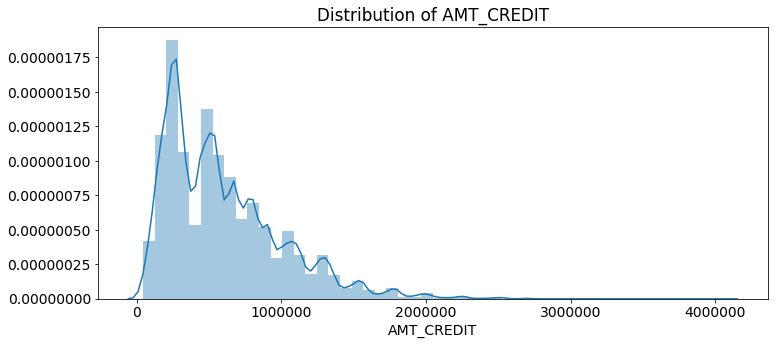

In [58]:
numeric("AMT_CREDIT")

In [59]:
df_train["AMT_INCOME_TOTAL"].dtype

dtype('float64')

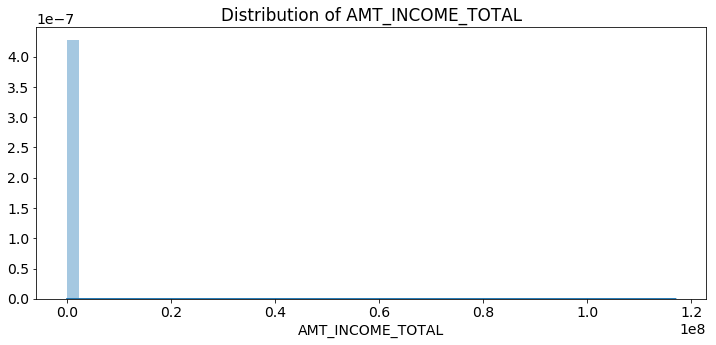

In [60]:
numeric("AMT_INCOME_TOTAL")

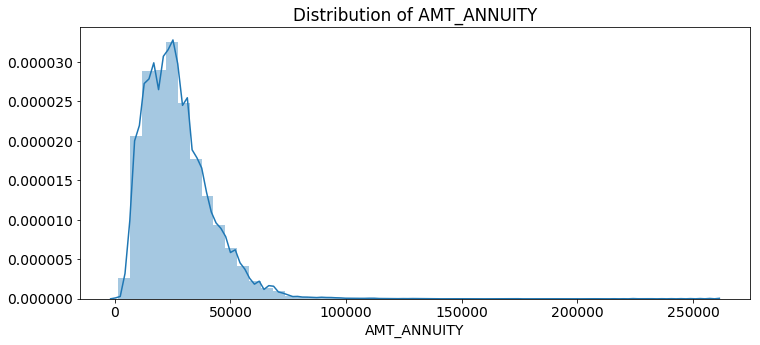

In [61]:
numeric("AMT_ANNUITY")

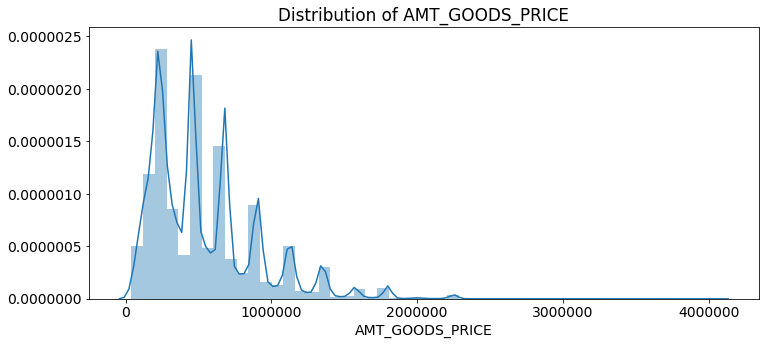

In [62]:
numeric("AMT_GOODS_PRICE")

In [63]:
anom = df_train[df_train['DAYS_EMPLOYED'] == 365243]
non_anom = df_train[df_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Well that is extremely interesting! It turns out that the anomalies have a lower rate of default.
Handling the anomalies depends on the exact situation, with no set rules. One of the safest approaches is just to set the anomalies to a missing value and then have them filled in (using Imputation) before machine learning. In this case, since all the anomalies have the exact same value, we want to fill them in with the same value in case all of these loans share something in common. The anomalous values seem to have some importance, so we want to tell the machine learning model if we did in fact fill in these values. As a solution, we will fill in the anomalous values with not a number (np.nan) and then create a new boolean column indicating whether or not the value was anomalous.

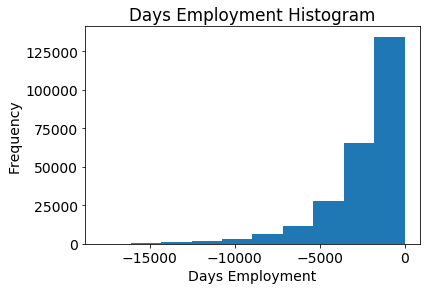

In [64]:
# Create an anomalous flag column
df_train['DAYS_EMPLOYED_ANOM'] = df_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
df_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

df_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

The distribution looks to be much more in line with what we would expect, and we also have created a new column to tell the model that these values were originally anomalous (becuase we will have to fill in the nans with some value, probably the median of the column). The other columns with DAYS in the dataframe look to be about what we expect with no obvious outliers.
As an extremely important note, anything we do to the training data we also have to do to the testing data. Let's make sure to create the new column and fill in the existing column with np.nan in the testing data.
The distribution looks to be much more in line with what we would expect, and we also have created a new column to tell the model that these values were originally anomalous (becuase we will have to fill in the nans with some value, probably the median of the column). The other columns with DAYS in the dataframe look to be about what we expect with no obvious outliers.
As an extremely important note, anything we do to the training data we also have to do to the testing data. Let's make sure to create the new column and fill in the existing column with np.nan in the testing data.

In [65]:
df_test['DAYS_EMPLOYED_ANOM'] = df_test["DAYS_EMPLOYED"] == 365243
df_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (df_test["DAYS_EMPLOYED_ANOM"].sum(), len(df_test)))

There are 9274 anomalies in the test data out of 48744 entries


In [66]:
(df_train['DAYS_BIRTH']/365.0).describe()

count    307511.000000
mean        -43.936973
std          11.956133
min         -69.120548
25%         -53.923288
50%         -43.150685
75%         -34.008219
max         -20.517808
Name: DAYS_BIRTH, dtype: float64

<h1> Dataset Prep for Another set of EDA

In [67]:
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np 
import seaborn as sns
import random 
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

path = "../input/"

def bar_hor(df, col, title, color, w=None, h=None, lm=0, limit=100, return_trace=False, rev=False, xlb = False):
    cnt_srs = df[col].value_counts()
    yy = cnt_srs.head(limit).index[::-1] 
    xx = cnt_srs.head(limit).values[::-1] 
    if rev:
        yy = cnt_srs.tail(limit).index[::-1] 
        xx = cnt_srs.tail(limit).values[::-1] 
    if xlb:
        trace = go.Bar(y=xlb, x=xx, orientation = 'h', marker=dict(color=color))
    else:
        trace = go.Bar(y=yy, x=xx, orientation = 'h', marker=dict(color=color))
    if return_trace:
        return trace 
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

def bar_hor_noagg(x, y, title, color, w=None, h=None, lm=0, limit=100, rt=False):
    trace = go.Bar(y=x, x=y, orientation = 'h', marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)


def bar_ver_noagg(x, y, title, color, w=None, h=None, lm=0, rt = False):
    trace = go.Bar(y=y, x=x, marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)
    
def gp(col, title):
    df1 = df_train[df_train["TARGET"] == 1]
    df0 = df_train[df_train["TARGET"] == 0]
    a1 = df1[col].value_counts()
    b1 = df0[col].value_counts()
    
    total = dict(df_train[col].value_counts())
    x0 = a1.index
    x1 = b1.index
    
    y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
    y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]

    trace1 = go.Bar(x=a1.index, y=y0, name='Target : 1', marker=dict(color="#96D38C"))
    trace2 = go.Bar(x=b1.index, y=y1, name='Target : 0', marker=dict(color="#FEBFB3"))
    return trace1, trace2 


<h1> Imbalance of Data

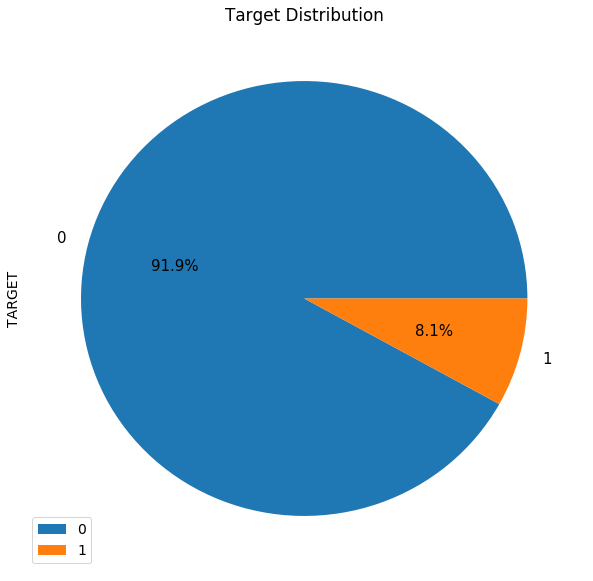

In [68]:
target_distribution = df_train['TARGET'].value_counts()
target_distribution.plot.pie(figsize=(10, 10),
                             title='Target Distribution',
                             fontsize=15, 
                             legend=True, 
                             autopct=lambda v: "{:0.1f}%".format(v))

<h1> Correlations

Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the `.corr` dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some [general interpretations of the absolute value of the correlation coefficent](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf) are:


* .00-.19 “very weak”
*  .20-.39 “weak”
*  .40-.59 “moderate”
*  .60-.79 “strong”
* .80-1.0 “very strong”

In [69]:
# Find correlations with the target and sort
correlations = df_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

('Most Positive Correlations:\n', OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64)
('\nMo

Let's take a look at some of more significant correlations: the DAYS_BIRTH is the most positive correlation. (except for TARGET because the correlation of a variable with itself is always 1!) Looking at the documentation, DAYS_BIRTH is the age in days of the client at the time of the loan in negative days (for whatever reason!). The correlation is positive, but the value of this feature is actually negative, meaning that as the client gets older, they are less likely to default on their loan (ie the target == 0). That's a little confusing, so we will take the absolute value of the feature and then the correlation will be negative.

<h1> Effect of Age on Repayment

In [70]:
# Find the correlation of the positive days since birth and target
df_train['DAYS_BIRTH'] = abs(df_train['DAYS_BIRTH'])
df_train['DAYS_BIRTH'].corr(df_train['TARGET'])

-0.07823930830982706

As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often.

Let's start looking at this variable. First, we can make a histogram of the age. We will put the x axis in years to make the plot a little more understandable.

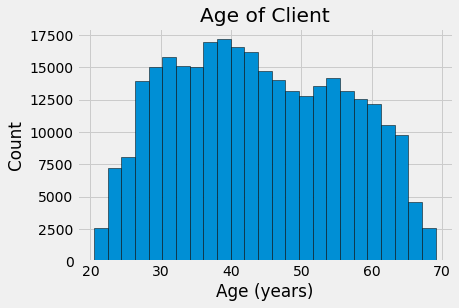

In [71]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(df_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

By itself, the distribution of age does not tell us much other than that there are no outliers as all the ages are reasonable. To visualize the effect of the age on the target, we will next make a kernel density estimation plot (KDE) colored by the value of the target. A kernel density estimate plot shows the distribution of a single variable and can be thought of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels to develop a single smooth curve). We will use the seaborn kdeplot for this graph.

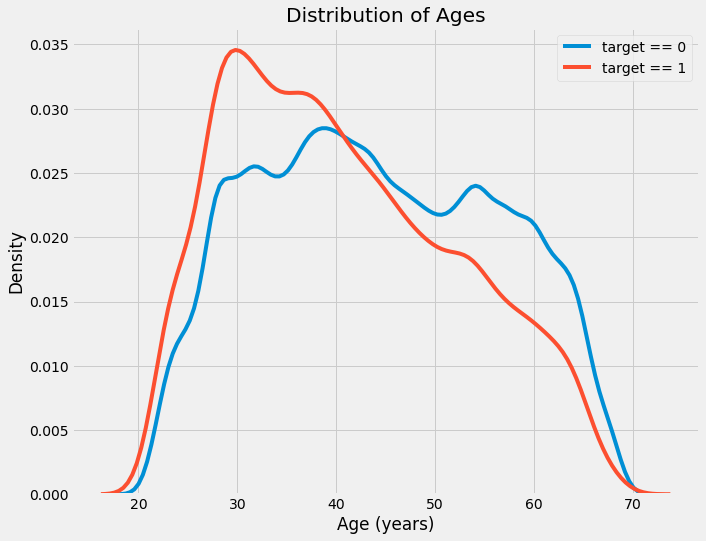

In [72]:
import seaborn as sns
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

The target == 1 curve skews towards the younger end of the range. Although this is not a significant correlation (-0.07 correlation coefficient), this variable is likely going to be useful in a machine learning model because it does affect the target. Let's look at this relationship in another way: average failure to repay loans by age bracket.

To make this graph, first we cut the age category into bins of 5 years each. Then, for each bin, we calculate the average value of the target, which tells us the ratio of loans that were not repaid in each age category.

In [73]:
# Age information into a separate dataframe
age_data = df_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       1        9461    25.920548  (25.0, 30.0]
1       0       16765    45.931507  (45.0, 50.0]
2       0       19046    52.180822  (50.0, 55.0]
3       0       19005    52.068493  (50.0, 55.0]
4       0       19932    54.608219  (50.0, 55.0]
5       0       16941    46.413699  (45.0, 50.0]
6       0       13778    37.747945  (35.0, 40.0]
7       0       18850    51.643836  (50.0, 55.0]
8       0       20099    55.065753  (55.0, 60.0]
9       0       14469    39.641096  (35.0, 40.0]

In [74]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.123036   8532.795625    23.377522
(25.0, 30.0]  0.111436  10155.219250    27.822518
(30.0, 35.0]  0.102814  11854.848377    32.479037
(35.0, 40.0]  0.089414  13707.908253    37.555913
(40.0, 45.0]  0.078491  15497.661233    42.459346
(45.0, 50.0]  0.074171  17323.900441    47.462741
(50.0, 55.0]  0.066968  19196.494791    52.593136
(55.0, 60.0]  0.055314  20984.262742    57.491131
(60.0, 65.0]  0.052737  22780.547460    62.412459
(65.0, 70.0]  0.037270  24292.614340    66.555108

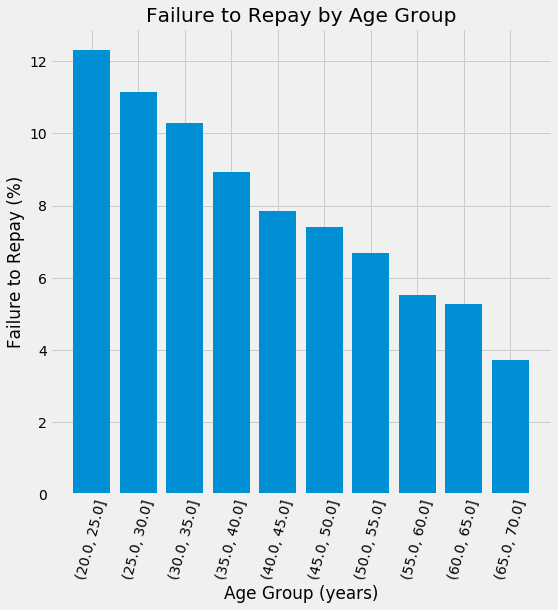

In [75]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

There is a clear trend: younger applicants are more likely to not repay the loan! The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group.
This is information that could be directly used by the bank: because younger clients are less likely to repay the loan, maybe they should be provided with more guidance or financial planning tips. This does not mean the bank should discriminate against younger clients, but it would be smart to take precautionary measures to help younger clients pay on time.

<h1>Exterior Sources

Exterior Sources
The 3 variables with the strongest negative correlations with the target are EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3. According to the documentation, these features represent a "normalized score from external data source". I'm not sure what this exactly means, but it may be a cumulative sort of credit rating made using numerous sources of data.

Let's take a look at these variables.

First, we can show the correlations of the EXT_SOURCE features with the target and with each other.

In [76]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = df_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'NAME_EDUCATION_TYPE_Higher education', 'CODE_GENDER_F']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

plt.figure(figsize = (25, 36))

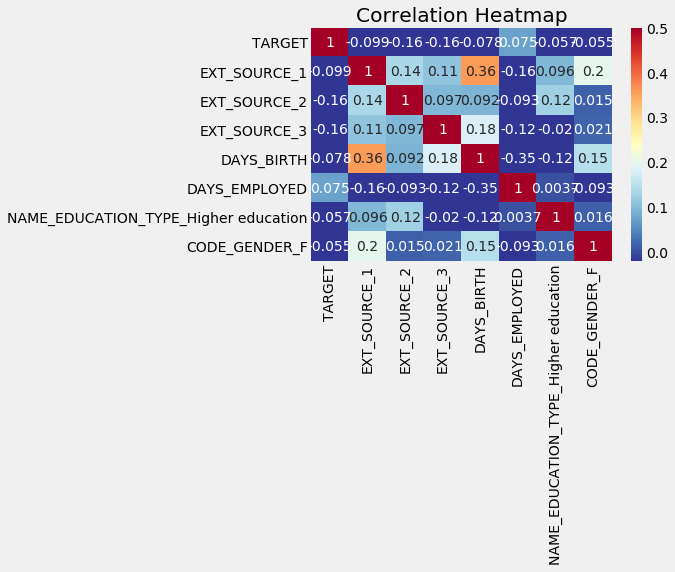

In [77]:
# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.02, annot = True, vmax = 0.5)
plt.title('Correlation Heatmap');


All three EXT_SOURCE featureshave negative correlations with the target, indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan. We can also see that DAYS_BIRTH is positively correlated with EXT_SOURCE_1 indicating that maybe one of the factors in this score is the client age.

Next we can look at the distribution of each of these features colored by the value of the target. This will let us visualize the effect of this variable on the target.

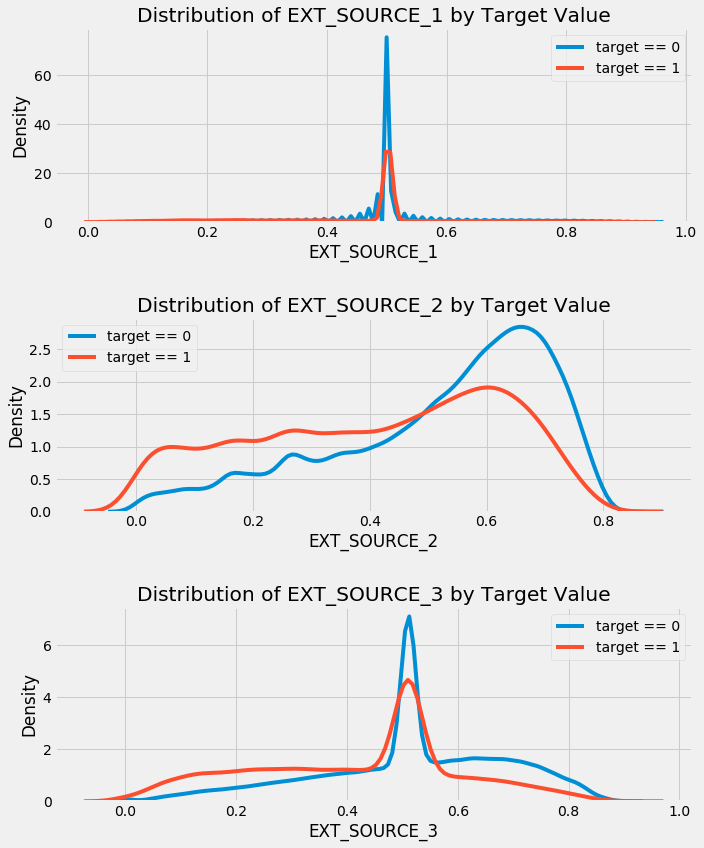

In [78]:
plt.figure(figsize = (10, 12))
# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)



EXT_SOURCE_3 displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan. The relationship is not very strong (in fact they are all considered very weak, but these variables will still be useful for a machine learning model to predict whether or not an applicant will repay a loan on time.

<h1> Pairs Plot

As a final exploratory plot, we can make a pairs plot of the `EXT_SOURCE` variables and the `DAYS_BIRTH` variable. The [Pairs Plot](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166) is a great exploration tool because it lets us see relationships between multiple pairs of variables as well as distributions of single variables. Here we are using the seaborn visualization library and the PairGrid function to create a Pairs Plot with scatterplots on the upper triangle, histograms on the diagonal, and 2D kernel density plots and correlation coefficients on the lower triangle.

If you don't understand this code, that's all right! Plotting in Python can be overly complex, and for anything beyond the simplest graphs, I usually find an existing implementation and adapt the code (don't repeat yourself)! 

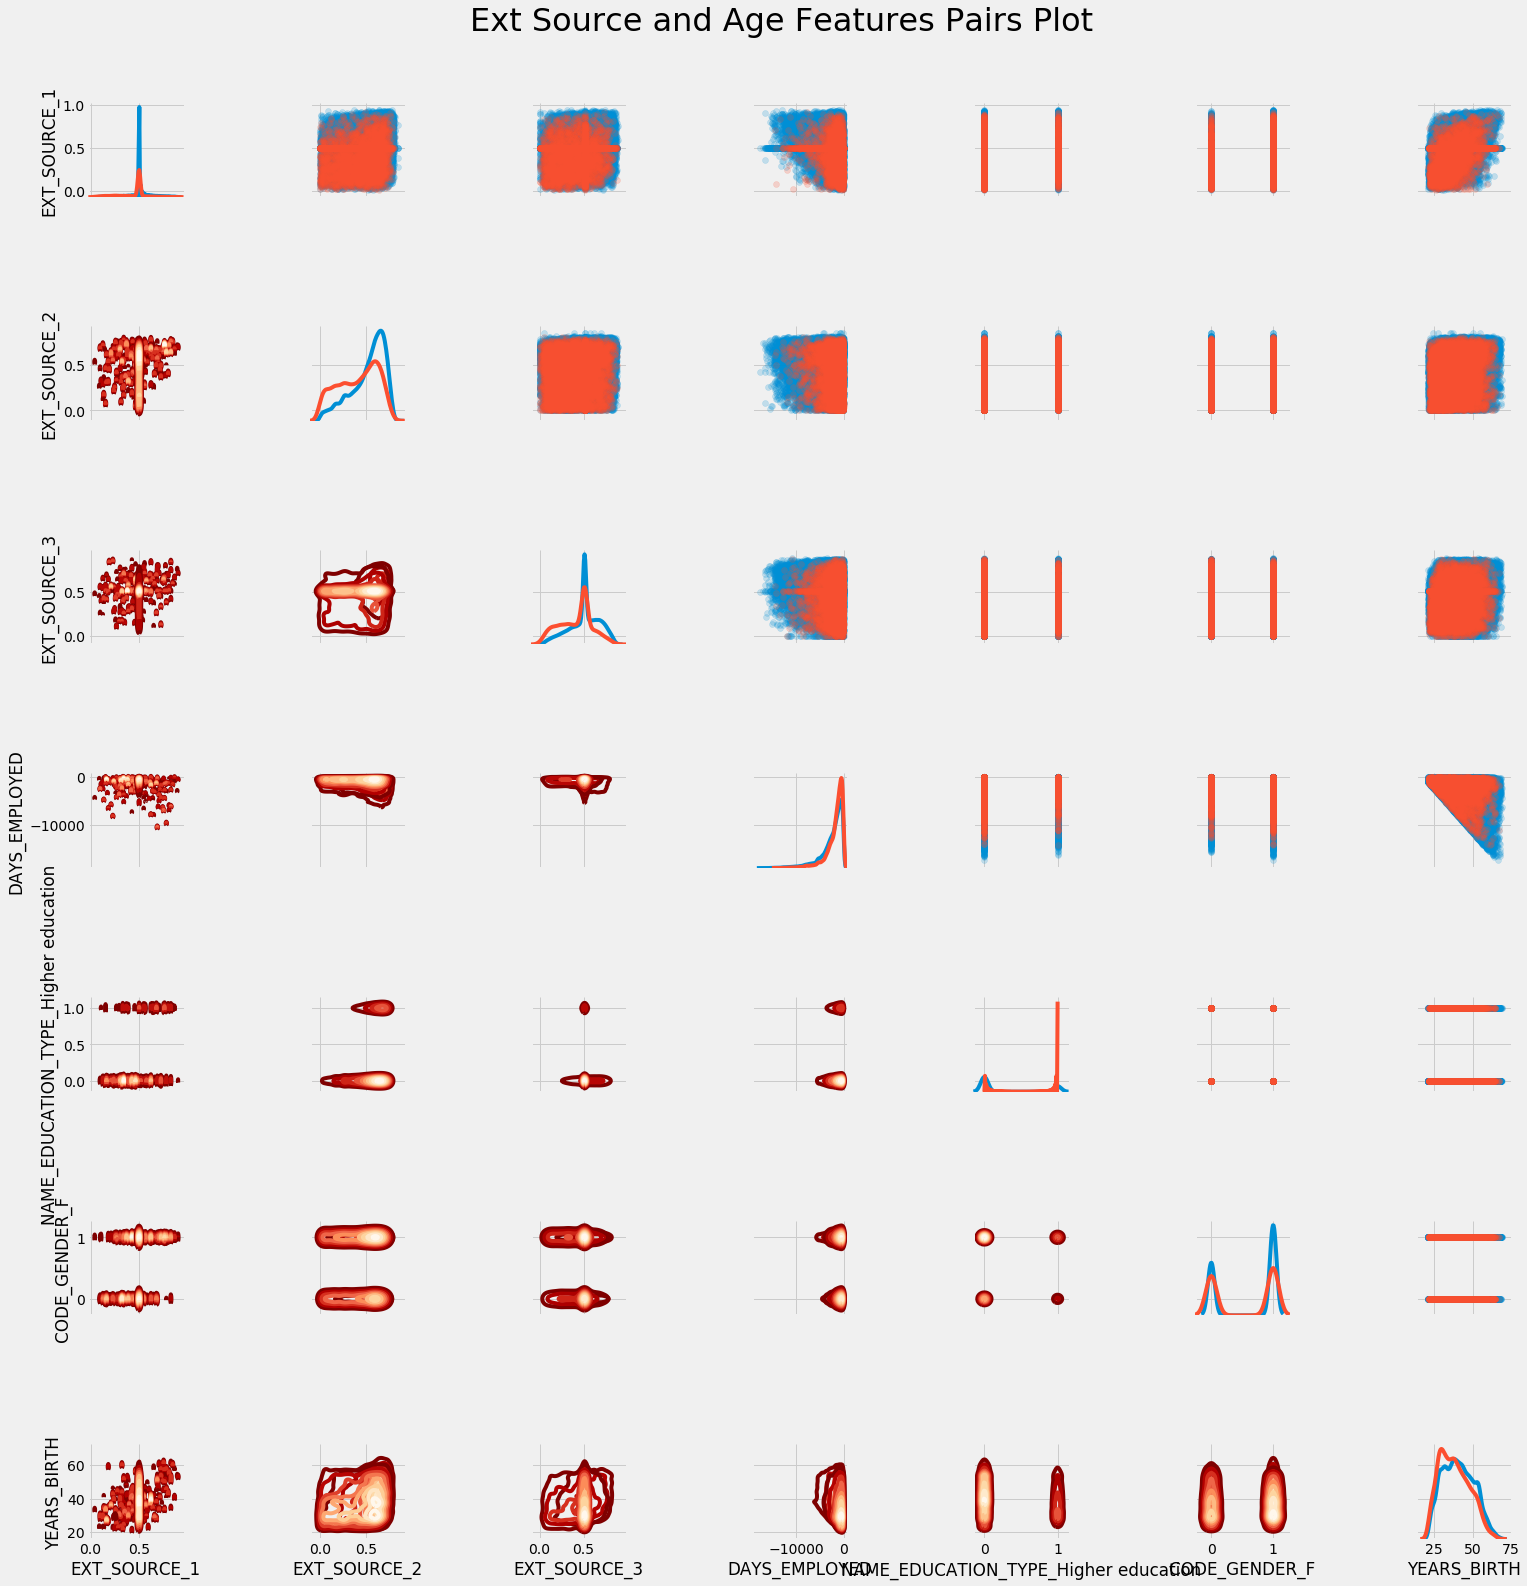

In [79]:

# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);


In this plot, the red indicates loans that were not repaid and the blue are loans that are paid. We can see the different relationships within the data. There does appear to be a moderate positive linear relationship between the `EXT_SOURCE_1` and the `DAYS_BIRTH` (or equivalently `YEARS_BIRTH`), indicating that this feature may take into account the age of the client. 

307511
[3.25191619e-06 6.50383238e-06 9.75574857e-06 ... 9.99993496e-01
 9.99996748e-01 1.00000000e+00]


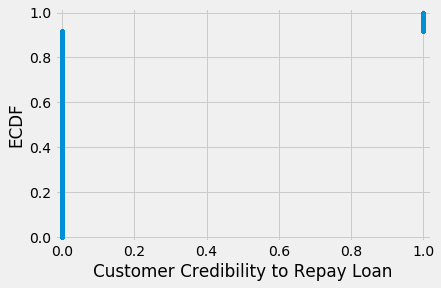

In [80]:
n= len(df_train)
print(n)
x = np.sort(df_train['TARGET'])
y = np.arange(1,len(x)+1)/float(len(x)) 
print (y)

_= plt.plot(x, y, marker = '.', linestyle = 'none')
_= plt.xlabel('Customer Credibility to Repay Loan')
_= plt.ylabel('ECDF')
_= plt.margins(.02)

plt.show()

In [81]:
# Checking ECDF Distribution of Ability to Repay Loan across the real data and theoretical samples of data
def ecdf(data):
    x= np.sort(data)
    n= float(len(data))
    y = np.arange(1, n+1)/n
    return x,y

%matplotlib inline
plt.figure(figsize=(25,20))

# Seed the random number generator:
np.random.seed(15)
#Sample data for theortical normal dist
samples = np.random.normal(np.mean(df_train.TARGET), np.std(df_train.TARGET), size=10000)
samples

array([-0.00435514,  0.17315615,  0.0382565 , ...,  0.28558261,
       -0.14273527,  0.07132198])

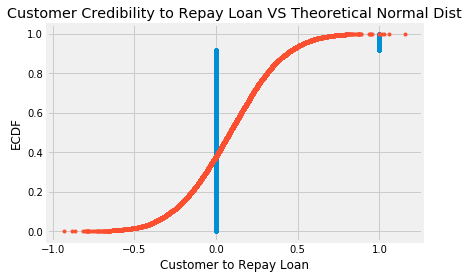

In [82]:
#find ecdf of data
x_count, y_count = ecdf(df_train.TARGET)
x_theor, y_theor = ecdf(samples)

fig = plt.plot(x_count, y_count, marker='.', linestyle='none')
fig = plt.plot(x_theor, y_theor, marker='.', linestyle='none')

# Label axes and add legend and a title:
fig = plt.title('Customer Credibility to Repay Loan VS Theoretical Normal Dist')
fig = plt.xlabel('Customer to Repay Loan')
fig = plt.ylabel('ECDF')

# Save and display the plots:
#plt.savefig('reports/figures/cdf_body_temps.png')
plt.show()

Compare the distribution of the data to the theoretical distribution of the data. This is done by comparing the ecdf First define a function for computing the ecdf from a data set. Next use np.random.normal to sample the theoretical normal distribution and overlay the ecdf of both data sets to compare distribution. Since theoretical ECDF is continuous curve while real data set is contiguous bar for 0 & 1 since it's classification problem but we may consider any data points closer to value '0' indicates 'will repay loan on time', 1 (will have difficulty repaying loan)

In [83]:
np.percentile(df_train['TARGET'], [25, 50, 75, 90, 98, 100])

array([0., 0., 0., 0., 1., 1.])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17e0ce10>]],
      dtype=object)

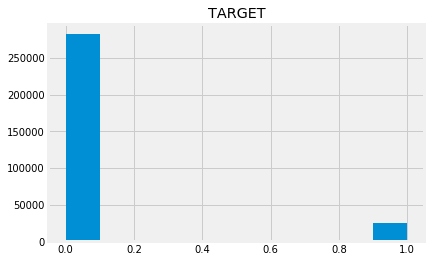

In [84]:
pd.DataFrame.hist(df_train, column='TARGET')

<b> Variance

In [85]:
np.var(df_train['TARGET'])

0.0742116771655796

<b> Standard Deviation

In [86]:
np.std(df_train['TARGET'])

0.27241820270602257

<b> Covariance

In [87]:
np.cov(df_train['TARGET'], df_train['EXT_SOURCE_1'])

array([[ 0.07421192, -0.0037652 ],
       [-0.0037652 ,  0.01943096]])

In [88]:
np.cov(df_train['TARGET'], df_train['DAYS_BIRTH'])

array([[ 7.42119185e-02, -9.30133834e+01],
       [-9.30133834e+01,  1.90443968e+07]])

<b> Pearson Correlation Coeffient

In [89]:
np.corrcoef(df_train['TARGET'], df_train['DAYS_BIRTH'])

array([[ 1.        , -0.07823931],
       [-0.07823931,  1.        ]])

In [90]:
#<b> Is the sample size large? Are the observations independent?

In [91]:
# print('We have', len(df_train), 'samples across', len(list(df_train.columns)), 'features.')
# # confirmed here: https://ww2.amstat.org/publications/jse/datasets/normtemp.txt

# print(df_train.groupby(['CODE_GENDER']).count(), df_train.info())

<h1> Confidence Interval 

<B> Step 1: Build a function to create a bootstrap replicate

In [92]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(df_train['TARGET'], size=len(df_train['TARGET'])))
#np.random.choice() works on linear model

<b> Step 2: Another function to generate multiple such bootstrap samples

In [93]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

<b> Step 3: Plot the histogram for bootstrap replicates

0.0004912536560492155
0.0004897216997795728


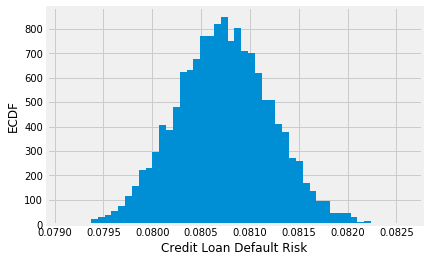

In [94]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(df_train['TARGET'], np.mean, 10000)

# Compute and print SEM Standard Error of the Mean
sem = np.std(df_train['TARGET']) / np.sqrt(len(df_train['TARGET']))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('Credit Loan Default Risk')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

<b> This is bootstrap estimate of the probability distribution function of the mean of 'Credit Loan Default Risk'at the Home Credit Group. Remember, we are estimating the mean 'Credit Loan Default Risk' we would get if the Home Credit Group could repeat all of the measurements over and over again. This is a probabilistic estimate of the mean. I plot the PDF as a histogram, and I see that it is not Normal as it has slightly longer right tail.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the standard error of the mean, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set.
Notice that the SEM we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

<b> Assuming 95% Confidence interval i.e. give the 2.5th and 97.5th percentile of bootstrap replicates is stored as bs_replicates

In [95]:
np.percentile(bs_replicates, [2.5, 97.5])

array([0.07979544, 0.08170765])

<b> The above steps may be repeated to show for Variance function as well

<h1> <B> Extending Confidence Interval Concept to Pairs Bootstrap

[-0.20051359 -0.1864092 ]


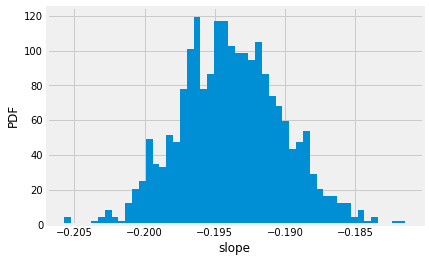

In [96]:
#Finding pairs bootstrap for slope & intercept of a linear function between Bike REntal Count and Registered User Type
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(df_train['EXT_SOURCE_1'], df_train['TARGET'], 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))
# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

<h1> Hypothesis Testing

<b> <br> Null Hypothesis- There is no significant difference between EXT_SOURCE_1 and EXT_SOURCE_2 mean on 'Ability to Repay Loan'
    <br>
H0:  μEXT_SOURCE_1−μEXT_SOURCE_2=0
Significance Level: 95% Confidence α=0.05
Alternate Hypothesis -
There is significant difference between EXT_SOURCE_1 and EXT_SOURCE_2 mean on 'Ability to Repay Loan' <br> HA : μEXT_SOURCE_1−μEXT_SOURCE_2 != 0

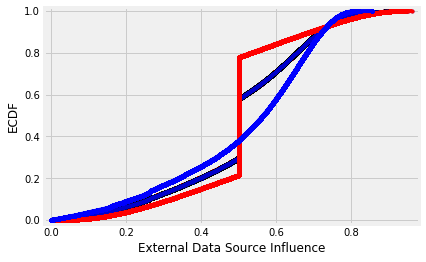

In [97]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(
                                    df_train['EXT_SOURCE_1'], df_train['EXT_SOURCE_2'])

    # Compute and plot ECDF from permutation sample 1 
    x1 = np.sort(perm_sample_1)
    y1 = np.arange(1,len(x1)+1)/float(len(x1)) 
    
    # Compute and plot ECDF from permutation sample 2
    x2 = np.sort(perm_sample_2)
    y2 = np.arange(1,len(x2)+1)/float(len(x2))


    # Plot ECDFs of permutation sample
    _ = plt.plot(x1, y1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x2, y2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)
# Compute and plot ECDF from original 'registered'
x11 = np.sort(df_train['EXT_SOURCE_1'])
y11 = np.arange(1,len(x11)+1)/float(len(x11)) 

_ = plt.plot(x11, y11, marker='.', color= 'red')

# Compute and plot ECDF from original 'casual'
x22 = np.sort(df_train['EXT_SOURCE_2'])
y22 = np.arange(1,len(x22)+1)/float(len(x22)) 

_ = plt.plot(x22, y22, marker='.', color= 'blue')
# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('External Data Source Influence')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

<b> Permutation samples ECDFs overlap and give a purple haze. Few of the ECDFs from the permutation samples overlap with the observed External Source Data1 data towards right of the graph & even fewer overlap towards left, suggesting that the hypothesis is not commensurate with the data. External Source Data1 & External Source Data2 are not identically distributed and do not influence data in similar way. So Null Hypothesis is rejected.

<h1> In Depth Analysis

<h3>Imbalanced datasets

Here I will work on some techniques to handle highly unbalanced datasets, with a focus on resampling. The Home Credit Risk Prediction competition, is a classic problem of unbalanced classes, since Credit Loan in risk can be considered unusual cases when considering all clients. Other classic examples of unbalanced classes are the detection of financial fraud and attacks on computer networks.

Let's see how unbalanced the dataset is:

('Class 0:', 282686)
('Class 1:', 24825)
('Proportion:', 11.0, ': 1')


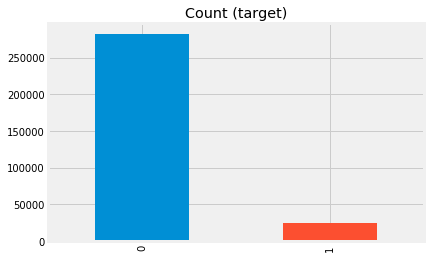

In [98]:
import numpy as np
import pandas as pd

df_train = pd.read_csv('application_train.csv')
target_count = df_train.TARGET.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [99]:
df_train.head(5)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100002         Cash loans           M            N               Y   
1      100003         Cash loans           F            N               N   
2      100004    Revolving loans           M            Y               Y   
3      100006         Cash loans           F            N               Y   
4      100007         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

    ...   FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0   ...                  0                0                0   
1   ...                  0                0                0   
2   ...                  0                0                0   
3   ...                  0                0                0   
4   ...                  0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  TARGET  
0                        0.0                         1.0       1  
1                        0.0                         0.0       0  
2                        0.0                         0.0       0  
3                        NaN                         NaN       0  
4                        0.0                         0.0       0  

[5 rows x 122 columns]

<h3> The metric trap

One of the major issues that novice users fall into when dealing with unbalanced datasets relates to the metrics used to evaluate their model. Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.

Let's do this experiment, using resampling:

<h1> Resampling

Resampling

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).



Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

Let's implement a basic example, which uses the DataFrame.sample method to get random samples each class:

In [100]:
# Class count
count_class_0, count_class_1 = df_train.TARGET.value_counts()

# Divide by class
df_class_0 = df_train[df_train['TARGET'] == 0]
df_class_1 = df_train[df_train['TARGET'] == 1]

<h3> Random under-sampling

Random under-sampling:
1    24825
0    24825
Name: TARGET, dtype: int64


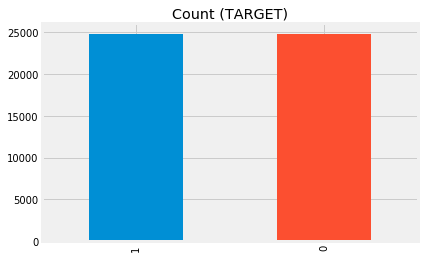

In [101]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.TARGET.value_counts())

df_test_under.TARGET.value_counts().plot(kind='bar', title='Count (TARGET)');

<h3> Random over-sampling

Random over-sampling:
1    282686
0    282686
Name: TARGET, dtype: int64


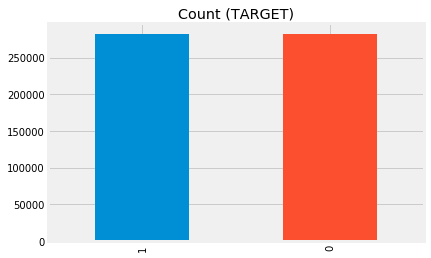

In [102]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.TARGET.value_counts())

df_test_over.TARGET.value_counts().plot(kind='bar', title='Count (TARGET)');

<h3> Python imbalanced-learn module

A number of more sophisticated resapling techniques have been proposed in the scientific literature.

For example, we can cluster the records of the majority class, and do the under-sampling by removing records from each cluster, thus seeking to preserve information. In over-sampling, instead of creating exact copies of the minority class records, we can introduce small variations into those copies, creating more diverse synthetic samples.

Let's apply some of these resampling techniques, using the Python library imbalanced-learn. It is compatible with scikit-learn and is part of scikit-learn-contrib projects.

In [103]:
import imblearn

For ease of visualization, let's create a small unbalanced sample dataset using the make_classification method:

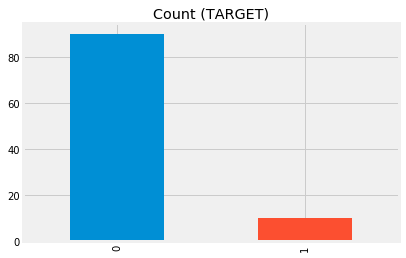

In [104]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10
)

df = pd.DataFrame(X)
df['TARGET'] = y
df.TARGET.value_counts().plot(kind='bar', title='Count (TARGET)');

We will also create a 2-dimensional plot function, plot_2d_space, to see the data distribution:

In [105]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

Because the dataset has many dimensions (features) and our graphs will be 2D, we will reduce the size of the dataset using Principal Component Analysis (PCA):

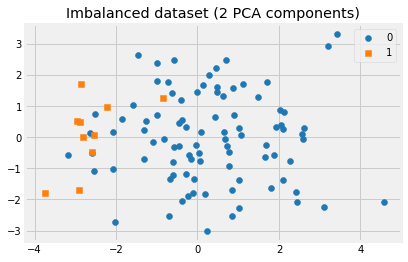

In [106]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

<h3> Random under-sampling and over-sampling with imbalanced-learn

('Removed indexes:', array([13, 53, 31, 58, 86, 37, 82, 85, 22, 95,  4,  8,  9, 14, 16, 40, 67,
       70, 71, 74]))


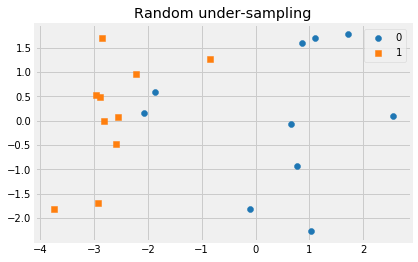

In [107]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

print('Removed indexes:', id_rus)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

(80, 'new random picked points')


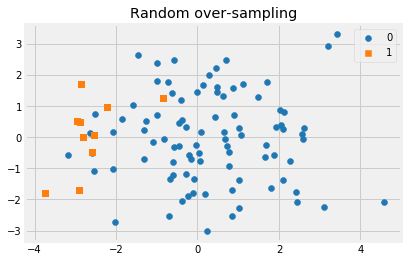

In [108]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

<h3> Under-sampling: Tomek links

Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

In the code below, we'll use ratio='majority' to resample the majority class.

('Removed indexes:', array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 90, 91, 92, 93, 94, 95, 97, 98, 99]))


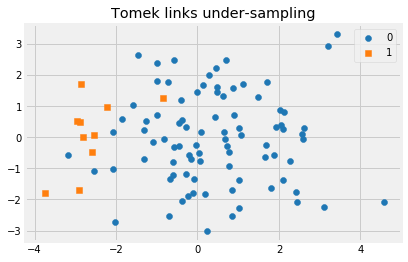

In [109]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

<h3> Under-sampling: Cluster Centroids

This technique performs under-sampling by generating centroids based on clustering methods. The data will be previously grouped by similarity, in order to preserve information.

In this example we will pass the {0: 10} dict for the parameter ratio, to preserve 10 elements from the majority class (0), and all minority class (1) .

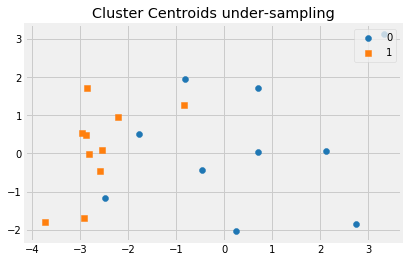

In [110]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 10})
X_cc, y_cc = cc.fit_sample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

<h3> Over-sampling: SMOTE

SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

We'll use ratio='minority' to resample the minority class.

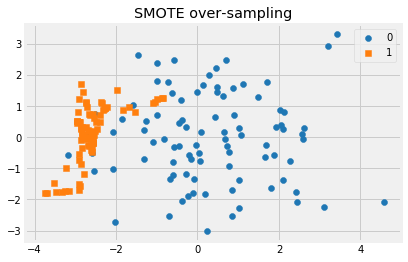

In [111]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

<h3> Over-sampling followed by under-sampling

Now, we will do a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques:

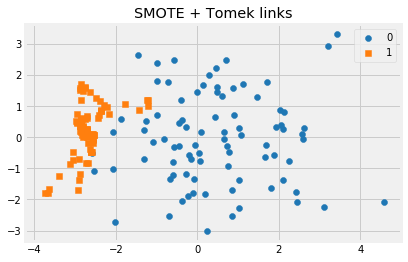

In [112]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

<h1> Deploying Machine Learning Model over Resampled Dataset

In [113]:
# Deploying Logistic Regression
#Splitting the dataset
#Keep the following 6 features (variables) which are important
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# X = df_train.iloc[:, :-1]
# y = df_train.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt, test_size=0.2, random_state=0)
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [114]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [115]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.79      0.88        14
          1       0.87      1.00      0.93        20

avg / total       0.92      0.91      0.91        34

0.9117647058823529


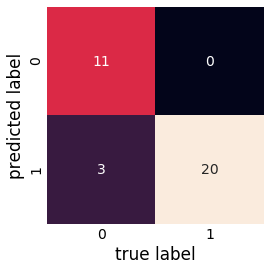

In [116]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

<h1> Random Forest Classifier

In [117]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

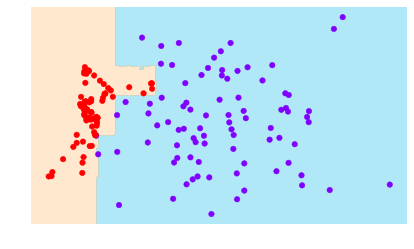

In [118]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X_smt, y_smt);

We see that by averaging over 100 randomly perturbed models, we end up with an overall model that is much closer to our intuition about how the parameter space should be split.

In [128]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [129]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      0.89      0.94        18
          1       0.93      1.00      0.96        25

avg / total       0.96      0.95      0.95        43

0.9534883720930233


In [120]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

             precision    recall  f1-score   support

          0       0.89      1.00      0.94        16
          1       1.00      0.93      0.96        27

avg / total       0.96      0.95      0.95        43



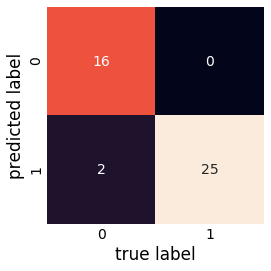

In [121]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

References:
http://www.jmlr.org/papers/volume18/16-365/16-365.pdf
https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html
https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

<h1> Decision Tree Classification

In [130]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [131]:
X_train, X_test, y_train, y_test = train_test_split( X_smt, y_smt, test_size = 0.3, random_state = 100)
clf = tree.DecisionTreeClassifier()
clf.fit(X=X_train, y=y_train)
clf.feature_importances_ # [ 1.,  0.,  0.]
clf.score(X=X_test, y=y_test) # 1.0

1.0

In [132]:
y_pred = clf.predict(X_test)

In [133]:
#Accuracy Score
print "Accuracy is ", accuracy_score(y_test,y_pred)*100

Accuracy is  100.0


In [126]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        23
          1       1.00      1.00      1.00        28

avg / total       1.00      1.00      1.00        51



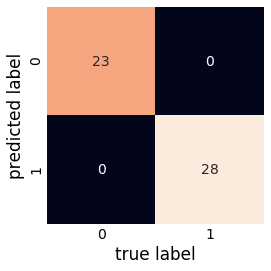

In [127]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');